In [ ]:
#==============FINANCIAL SENTIMENT ANALYSIS =====================#

#IMPORTING LIBRARY'S

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSTVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from xgboost import XGBClassifier

from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('/content/data.csv')
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [ ]:
#stats of data frame
df.describe()



,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


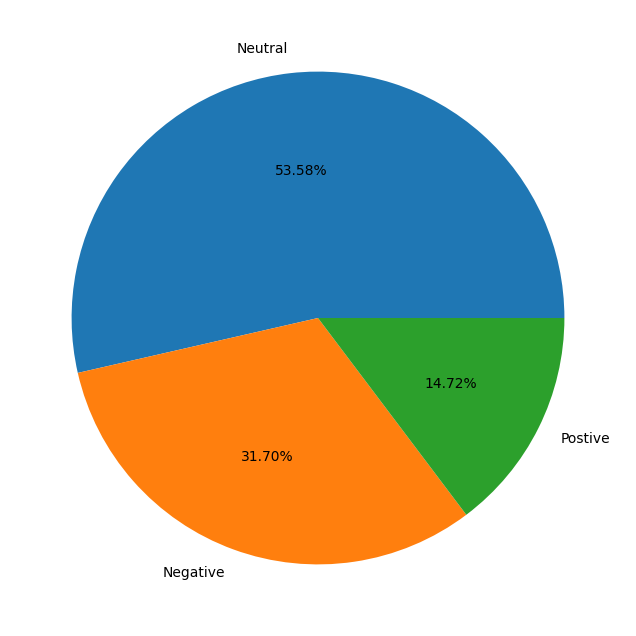

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,8
#create pie chart among sentiments
plt.pie(df.Sentiment.value_counts() / len(df),
        labels = ['Neutral', 'Negative', 'Postive'],
       autopct='%1.2f%%',
       )
plt.show()

In [ ]:
#data preprocessing

def tweet_to_words(tweet):
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return ' '.join(meaningful_word)


In [ ]:
def tweet_len(tweet):
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return (len(meaningful_word))

In [ ]:
df['Sentiments'] = df['Sentiment'].apply(lambda x:0 if x=='negative' else 1)
df['clean_tweet'] = df['Sentence'].astype(str).apply(lambda x:tweet_to_words(x))
df['tweet_length'] = df['Sentence'].astype(str).apply(lambda x:tweet_len(x))
train_data, test_data = train_test_split(df,test_size=0.2,random_state=123)


In [ ]:
train_clean_tweet = []
for tweet in train_data['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet = []
for tweet in test_data['clean_tweet']:
    test_clean_tweet.append(tweet)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer='word')
train_features = v.fit_transform(train_clean_tweet)
test_features = v.transform(test_clean_tweet)

In [ ]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
    SGDClassifier()
    ]


In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train_data['Sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train_data['Sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test_data['Sentiment'])*100
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy) + '%')

Accuracy of LogisticRegression is 52.3524379811805%
Accuracy of KNeighborsClassifier is 52.18135158254918%
Accuracy of DecisionTreeClassifier is 59.88023952095808%
Accuracy of RandomForestClassifier is 62.18990590248076%
Accuracy of AdaBoostClassifier is 64.24294268605647%
Accuracy of GaussianNB is 52.43798118049615%
Accuracy of SGDClassifier is 64.84174508126604%


In [ ]:
result = pd.DataFrame({'Models':Model})
result['Accuracy'] = Accuracy
result = result.sort_values(by='Accuracy',ascending=False)
result

,Models,Accuracy
6,SGDClassifier,64.841745
4,AdaBoostClassifier,64.242943
3,RandomForestClassifier,62.189906
2,DecisionTreeClassifier,59.880240
5,GaussianNB,52.437981
0,LogisticRegression,52.352438
1,KNeighborsClassifier,52.181352


import numpy as np
from google.colab import autoviz
df_781901781806983505 = autoviz.get_df('df_781901781806983505')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_781901781806983505, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7592944747773935144 = autoviz.get_df('df_7592944747773935144')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7592944747773935144, *['Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz
df_998959958168017630 = autoviz.get_df('df_998959958168017630')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_998959958168017630, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5166486924005440050 = autoviz.get_df('df_5166486924005440050')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5166486924005440050, *['Accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8528261603759957559 = autoviz.get_df('df_8528261603759957559')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8528261603759957559, *['Models'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7812465599972657299 = autoviz.get_df('df_7812465599972657299')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7812465599972657299, *[[['index', 'Accuracy']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_1163088591051363002 = autoviz.get_df('df_1163088591051363002')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1163088591051363002, *['index', 'Models'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7960357463195196571 = autoviz.get_df('df_7960357463195196571')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7960357463195196571, *['Accuracy', 'Models'], **{'inner': 'stick'})
chart